Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         xx/xx/xxxx
Name:         student name
Worked with:  other students' name
Location:     nyc17_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

In [101]:
import sys
import pandas as pd
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


# Source: http://web.mta.info/developers/turnstile.html

def xget_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)


### Challenge 1

Read the MTA data file & clean up

In [102]:
%time
%matplotlib inline
#!ls -lb mta_data
import os
import re

from pathlib import Path

def my_get_data():
    rootdir = Path('./mta_data/')
    # Return a list of regular files only, not directories
    file_list = list([str(f) for f in rootdir.glob('turn*.txt') if f.is_file()])
    icount = 0
        
        
    # process 5k rows of each file
    dfs = []
    for f in file_list:
        x = int(re.findall("\d+", f)[0])
#        if (x > 151114-10):    #  files after 2014 October
        if (x > 141025):    #  files after 2014 October
            x = pd.read_csv(f)
            print("===============", f)
            #print(x.columns)
            dfs.append( x )
            icount += 1
            #print('icount',icount)
            if (icount == 50):   # read 50 files only for now
                break
           
    # merge & return
    mta = pd.concat(dfs)
    mta.columns = [x.strip() for x in mta.columns] 
    return mta

#mta = get_data()

#print(f, "file count", len(mta))

        
mta = my_get_data()

mta.head(20)
        



CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
=============== mta_data/turnstile_141101.txt
=============== mta_data/turnstile_141108.txt
=============== mta_data/turnstile_141115.txt
=============== mta_data/turnstile_141122.txt
=============== mta_data/turnstile_141129.txt
=============== mta_data/turnstile_141206.txt
=============== mta_data/turnstile_141213.txt
=============== mta_data/turnstile_141220.txt
=============== mta_data/turnstile_141227.txt
=============== mta_data/turnstile_150103.txt
=============== mta_data/turnstile_150110.txt
=============== mta_data/turnstile_150117.txt
=============== mta_data/turnstile_150124.txt
=============== mta_data/turnstile_150131.txt
=============== mta_data/turnstile_150207.txt
=============== mta_data/turnstile_150214.txt
=============== mta_data/turnstile_150221.txt
=============== mta_data/turnstile_150228.txt
=============== mta_data/turnstile_150307.txt
=============== mta_data/turnstile_150314.txt
=============== 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,00:00:00,REGULAR,4841726.0,1642694.0
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,04:00:00,REGULAR,4841761.0,1642697.0
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,08:00:00,REGULAR,4841779.0,1642714.0
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,12:00:00,REGULAR,4841925.0,1642826.0
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,16:00:00,REGULAR,4842220.0,1642910.0
5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,20:00:00,REGULAR,4842585.0,1642966.0
6,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/26/2014,00:00:00,REGULAR,4842752.0,1642997.0
7,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/26/2014,04:00:00,REGULAR,4842791.0,1643004.0
8,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/26/2014,08:00:00,REGULAR,4842810.0,1643023.0
9,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/26/2014,12:00:00,REGULAR,4842927.0,1643098.0


**TA COMMENT:**

Your helper function is coded well. Good job on that.

In [103]:
mta.count()
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,00:00:00,REGULAR,4841726.0,1642694.0
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,04:00:00,REGULAR,4841761.0,1642697.0
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,08:00:00,REGULAR,4841779.0,1642714.0
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,12:00:00,REGULAR,4841925.0,1642826.0
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,10/25/2014,16:00:00,REGULAR,4842220.0,1642910.0


### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

<pre>
Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
    [
    [datetime.datetime(2013, 3, 2, 3, 0), 3788],
    [datetime.datetime(2013, 3, 2, 7, 0), 2585],
    [datetime.datetime(2013, 3, 2, 12, 0), 10653],
    [datetime.datetime(2013, 3, 2, 17, 0), 11016],
    [datetime.datetime(2013, 3, 2, 23, 0), 10666],
    [datetime.datetime(2013, 3, 3, 3, 0), 10814],
    [datetime.datetime(2013, 3, 3, 7, 0), 10229],
    ...
    ],
    ....
}
</pre>


## reformat date

In [201]:
import dateutil.parser
#mta.set_index(['C/A','UNIT','SCP','STATION'], inplace=True)
#mta['mydate'] = mta.DATE + ' ' +  mta.TIME
mta['DATE_TIME'] = pd.to_datetime(mta.DATE + " " + mta.TIME, format="%m/%d/%Y %H:%M:%S")
#mta['MONTH'] = mta.DATE_TIME.map(lambda x: x.year*100 + x.month)

#works - mta['DAY']         = mta.DATE_TIME.map(lambda x: x.year*10000 + x.month*100 + + x.day)
mta['DAY']      = mta['DATE_TIME'].dt.date
mta['WEEKDAY']  = mta['DATE_TIME'].dt.weekday_name
mta['WEEK']     = mta['DATE_TIME'].dt.week

#mta.mydate = mta.date_time.apply(lambda x: dateutil.parser.parse(x))
#type(dateutil.parser.parse(mta.mydate[0]))

In [202]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,WEEKDAY,WEEK
193698,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/09/2015,21:00:00,REGULAR,5554.0,227.0,2015-10-09 21:00:00,2015-10-09,Friday,41
193697,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/09/2015,17:00:00,REGULAR,5554.0,227.0,2015-10-09 17:00:00,2015-10-09,Friday,41
193696,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/09/2015,13:00:00,REGULAR,5554.0,227.0,2015-10-09 13:00:00,2015-10-09,Friday,41
193695,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/09/2015,09:00:00,REGULAR,5554.0,227.0,2015-10-09 09:00:00,2015-10-09,Friday,41
193694,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/09/2015,05:00:00,REGULAR,5554.0,227.0,2015-10-09 05:00:00,2015-10-09,Friday,41


In [203]:
# clean up
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)




,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,LEXINGTON AVE,2014-10-25 00:00:00,1
6250551,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 22:00:00,1
6250545,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 02:00:00,1
6250546,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 06:00:00,1
6250547,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 09:54:18,1
6250548,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 10:00:00,1
6250549,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 14:00:00,1
6250550,R142,R293,01-00-02,34 ST-PENN STA,2015-05-04 18:00:00,1
6250552,R142,R293,01-00-02,34 ST-PENN STA,2015-05-05 02:00:00,1
6250543,R142,R293,01-00-02,34 ST-PENN STA,2015-05-03 18:00:00,1


#### ================================= Challenge 3 ===============================


- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.


In [107]:
mta.TIME.value_counts().head(20)


04:00:00    726436
00:00:00    726334
08:00:00    726277
20:00:00    726171
16:00:00    725974
12:00:00    725680
01:00:00    388168
05:00:00    387897
17:00:00    387790
09:00:00    387728
13:00:00    387650
21:00:00    387608
03:00:00    286900
19:00:00    286894
23:00:00    286835
07:00:00    286811
11:00:00    286805
15:00:00    286663
18:00:00     29208
22:00:00     29195
Name: TIME, dtype: int64

#### ANSWER (3):  

The most common time interval is every 4 hours as is evident from the table above


#### ================================= Challenge 4 ===============================
We will plot the daily time series for a turnstile.
In ipython notebook, add this to the beginning of your next cell:

<pre>

%matplotlib inline
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

</pre>

Ans: see below

#### ================================= Challenge 5 ===============================

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


## Group by Turnstile daily

In [204]:
#z = mta.groupby( ['C/A','UNIT','SCP','STATION', 
#                  mta['date_time'].map(lambda x: x.year*10000 + x.month*100 + x.day) ], as_index=True  )

#gday = mta.groupby( ['STATION', 'DAY' ], as_index=True  )

gday = mta.groupby( ['C/A','UNIT','SCP','STATION', 'DAY', 'WEEKDAY', 'WEEK' ], as_index=True  )

gday_totals = gday.agg({ 'ENTRIES': {'ENTRIES_MIN':'min'}})


#gday_totals.to_csv('daily_total_by_unit.csv')

# calculate the DAILY offset column for ENTRIES
unit_daily =  gday_totals.reset_index()
unit_daily['ENTRIES_PREV'] = unit_daily.ENTRIES.ENTRIES_MIN.shift(1)
unit_daily['DAILY'] = unit_daily.ENTRIES.ENTRIES_MIN - unit_daily.ENTRIES_PREV

unit_daily.reset_index()

unit_daily.to_csv('unit_daily.csv')


unit_daily.head()

/Users/michaellin/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,C/A,UNIT,SCP,STATION,DAY,WEEKDAY,WEEK,ENTRIES,ENTRIES_PREV,DAILY
,,,,,,,,ENTRIES_MIN,,
0,A002,R051,02-00-00,LEXINGTON AVE,2014-10-25,Saturday,43,4841726.0,NaN,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,2014-10-26,Sunday,43,4842752.0,4841726.0,1026.0
2,A002,R051,02-00-00,LEXINGTON AVE,2014-10-27,Monday,44,4843532.0,4842752.0,780.0
3,A002,R051,02-00-00,LEXINGTON AVE,2014-10-28,Tuesday,44,4845235.0,4843532.0,1703.0
4,A002,R051,02-00-00,LEXINGTON AVE,2014-10-29,Wednesday,44,4846980.0,4845235.0,1745.0


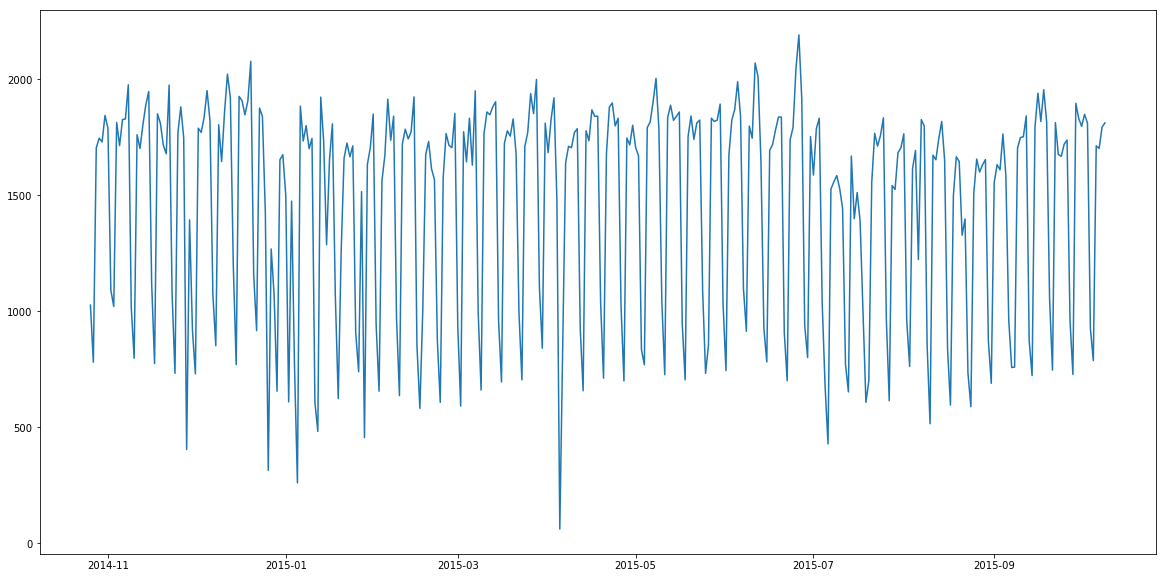

In [205]:
import matplotlib.pyplot as plt

# filter by one station for charting
stile_daily = unit_daily[ (unit_daily['C/A'] == 'A002') 
                             & (unit_daily['UNIT'] == 'R051') 
                             & (unit_daily['SCP'] == '02-00-00') 
                             & (unit_daily['STATION'] == 'LEXINGTON AVE') 
                             & (unit_daily.DAILY > 0)
                             & (unit_daily.DAILY < 10000)
                            ]


plt.figure(figsize=(20,10))
plt.plot(stile_daily.DAY, stile_daily.DAILY)

#print(stile_daily.DAY.head(20))
#print(stile_daily.DAILY.head(20))







#### =============================  Challenge 6 ================================

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.




## Group by STATION Daily

In [206]:
gday = unit_daily.groupby( ['STATION', 'DAY', 'WEEKDAY' ], as_index=True  )


gday_totals = gday.agg(
            {   
                'DAILY': { 'total':'sum' } 
            })


#gday_totals.to_csv('daily_total_by_station.csv')

station_daily =  gday_totals.reset_index()

# filter by one station for charting
lex_station = station_daily[ (station_daily.STATION == 'LEXINGTON AVE') 
                             & (station_daily.DAILY.total > 0)
                             & (station_daily.DAILY.total < 100000)
                            ]

lex_station.reset_index()
lex_station.head()

#lex_station.to_csv('daily_total_lexington.csv')

#lex_station.index = pd.to_datetime(lex_station['DAY'])
#del df['date']



/Users/michaellin/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,STATION,DAY,WEEKDAY,DAILY
,,,,total
94650,LEXINGTON AVE,2014-10-26,Sunday,17032.0
94651,LEXINGTON AVE,2014-10-27,Monday,12629.0
94652,LEXINGTON AVE,2014-10-28,Tuesday,34643.0
94653,LEXINGTON AVE,2014-10-29,Wednesday,36836.0
94654,LEXINGTON AVE,2014-10-30,Thursday,35992.0


In [111]:
lex_station.columns

MultiIndex(levels=[['DAILY', 'WEEKDAY', 'DAY', 'STATION'], ['total', '']],
           labels=[[3, 2, 1, 0], [1, 1, 1, 0]])

#### ====================  Challenge 7 ============================

Plot the time series for a station.


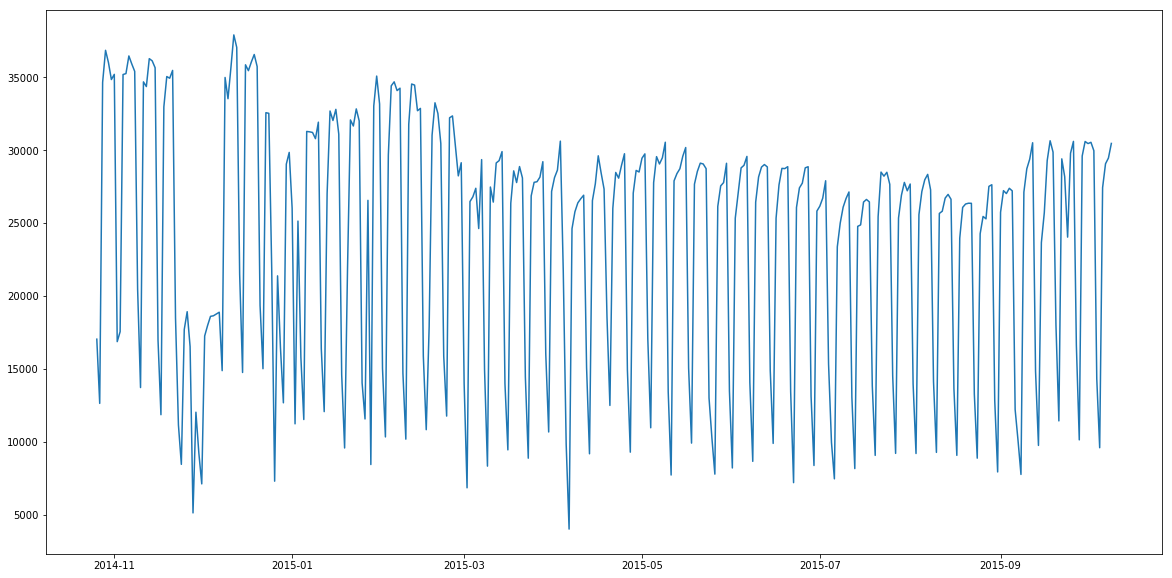

In [207]:
import matplotlib.pyplot as plt

# filter by one station for charting
station_daily = lex_station[ (lex_station['STATION'] == 'LEXINGTON AVE') 
                             & (lex_station.DAILY.total > 0)
                             & (lex_station.DAILY.total < 100000)
                            ]


plt.figure(figsize=(20,10))
plt.plot(station_daily.DAY, station_daily.DAILY)

#### ====================  Challenge 8 ============================
<pre>


- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.

`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

</pre>




In [291]:
unit_daily.head(100)
#del unit_daily['ENTRIES']
#del unit_daily['ENTRIES_PREV']
unit_daily.head(20)


,C/A,UNIT,SCP,STATION,DAY,WEEKDAY,WEEK,DAILY
,,,,,,,,
0,A002,R051,02-00-00,LEXINGTON AVE,2014-10-25,Saturday,43,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,2014-10-26,Sunday,43,1026.0
2,A002,R051,02-00-00,LEXINGTON AVE,2014-10-27,Monday,44,780.0
3,A002,R051,02-00-00,LEXINGTON AVE,2014-10-28,Tuesday,44,1703.0
4,A002,R051,02-00-00,LEXINGTON AVE,2014-10-29,Wednesday,44,1745.0
5,A002,R051,02-00-00,LEXINGTON AVE,2014-10-30,Thursday,44,1729.0
6,A002,R051,02-00-00,LEXINGTON AVE,2014-10-31,Friday,44,1843.0
7,A002,R051,02-00-00,LEXINGTON AVE,2014-11-01,Saturday,44,1789.0
8,A002,R051,02-00-00,LEXINGTON AVE,2014-11-02,Sunday,44,1091.0


In [292]:
kk1 = unit_daily[ ( unit_daily['WEEK'] >= 43 ) & ( unit_daily['WEEK'] <= 48 )   ] 
kk1.reset_index().head()



#k1 = kk1.groupby( ['STATION' ], as_index=False  )
#k1.agg ( { 'DAILY' : {'TOTAL' : 'sum'} } )


#k1

,index,C/A,UNIT,SCP,STATION,DAY,WEEKDAY,WEEK,DAILY
,,,,,,,,,
0,0,A002,R051,02-00-00,LEXINGTON AVE,2014-10-25,Saturday,43,NaN
1,1,A002,R051,02-00-00,LEXINGTON AVE,2014-10-26,Sunday,43,1026.0
2,2,A002,R051,02-00-00,LEXINGTON AVE,2014-10-27,Monday,44,780.0
3,3,A002,R051,02-00-00,LEXINGTON AVE,2014-10-28,Tuesday,44,1703.0
4,4,A002,R051,02-00-00,LEXINGTON AVE,2014-10-29,Wednesday,44,1745.0


In [301]:
#kk = unit_daily[ ( gday_totalsX['WEEK'] >= 43 ) & ( gday_totalsX['WEEK'] <= 55 ) ]
#[ ( unit_daily['WEEK'] >= 45 ) & ( unit_daily['WEEK'] <= 55 ) ]

# XXXXXXXXXXX - TODO FIX HERE 

kk1 = unit_daily[ ( unit_daily['WEEK'] >= 43 ) & ( unit_daily['WEEK'] <= 45 )   ] 

k1 = kk1.groupby( ['STATION', 'WEEK' ], as_index=True  )

k1.agg ( { 'DAILY' : {'TOTAL' : 'sum'} } ).reset_index()

k1.head()

/Users/michaellin/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,C/A,UNIT,SCP,STATION,DAY,WEEKDAY,WEEK,DAILY
,,,,,,,,
0,A002,R051,02-00-00,LEXINGTON AVE,2014-10-25,Saturday,43,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,2014-10-26,Sunday,43,1026.0
2,A002,R051,02-00-00,LEXINGTON AVE,2014-10-27,Monday,44,780.0
3,A002,R051,02-00-00,LEXINGTON AVE,2014-10-28,Tuesday,44,1703.0
4,A002,R051,02-00-00,LEXINGTON AVE,2014-10-29,Wednesday,44,1745.0
5,A002,R051,02-00-00,LEXINGTON AVE,2014-10-30,Thursday,44,1729.0
6,A002,R051,02-00-00,LEXINGTON AVE,2014-10-31,Friday,44,1843.0
9,A002,R051,02-00-00,LEXINGTON AVE,2014-11-03,Monday,45,1020.0
10,A002,R051,02-00-00,LEXINGTON AVE,2014-11-04,Tuesday,45,1813.0


**TA COMMENT:**

There seems to be negative as well as very large positive values. What could be reasons for these values? How would you resolve these erroneous values?

In [225]:
# GROUP it by station

gdayX = unit_daily.groupby( ['STATION', 'DAY', 'WEEKDAY', 'WEEK' ], as_index=False  )


gday_totalsX = gdayX.agg(
            {   
                'DAILY': { 'total':'sum' } 
            })

gday_totalsX.head().reset_index()


/Users/michaellin/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,index,STATION,DAY,WEEKDAY,WEEK,DAILY
,,,,,,total
0,0,1 AVE,2014-10-25,Saturday,43,-1.362597e+09
1,1,1 AVE,2014-10-26,Sunday,43,2.292300e+04
2,2,1 AVE,2014-10-27,Monday,44,1.703000e+04
3,3,1 AVE,2014-10-28,Tuesday,44,2.413400e+04
4,4,1 AVE,2014-10-29,Wednesday,44,2.545100e+04


In [234]:
gday_totalsX.reset_index()

line1 = gday_totalsX[ ( gday_totalsX['STATION'] == 'LEXINGTON AVE' ) 
            & ( gday_totalsX['WEEK'] == 44 )
            ]

line2 = gday_totalsX[ ( gday_totalsX['STATION'] == 'LEXINGTON AVE' ) 
            & ( gday_totalsX['WEEK'] == 45 )
            ]

line3 = gday_totalsX[ ( gday_totalsX['STATION'] == 'LEXINGTON AVE' ) 
            & ( gday_totalsX['WEEK'] == 46 )
            ]

line4 = gday_totalsX[ ( gday_totalsX['STATION'] == 'LEXINGTON AVE' ) 
            & ( gday_totalsX['WEEK'] == 47 )
            ]


line1.head(10)

,STATION,DAY,WEEKDAY,WEEK,DAILY
,,,,,total
94651,LEXINGTON AVE,2014-10-27,Monday,44,12629.0
94652,LEXINGTON AVE,2014-10-28,Tuesday,44,34643.0
94653,LEXINGTON AVE,2014-10-29,Wednesday,44,36836.0
94654,LEXINGTON AVE,2014-10-30,Thursday,44,35992.0
94655,LEXINGTON AVE,2014-10-31,Friday,44,34832.0
94656,LEXINGTON AVE,2014-11-01,Saturday,44,35187.0
94657,LEXINGTON AVE,2014-11-02,Sunday,44,16862.0


([<matplotlib.axis.XTick at 0x2bfb6f208>,
 <a list of 7 Text xticklabel objects>)

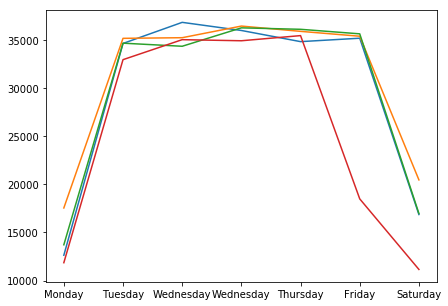

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
x = [1,2,3,4,5,6,7]
plt.plot(x, line1.DAILY.total)
plt.plot(x, line2.DAILY.total)
plt.plot(x, line3.DAILY.total)
plt.plot(x, line4.DAILY.total)
my_xticks = ['Monday','Tuesday','Wednesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(x, my_xticks)




**TA COMMENT:**

Two Wednesdays were added to the list of xtick marks.

#### ====================  Challenge 9 ============================

<pre>
- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate
</pre>


NOTE: looks like station daily ridership data is messed up for some stations.


In [396]:
x = (unit_daily[( unit_daily['WEEK'] >= 44 )
          & ( unit_daily['WEEK'] <= 47 )
           ]
 .groupby( ['STATION'], as_index=True  )
 .agg({'DAILY':'sum'})
 .sort_values(by='DAILY',ascending=0))


#top10 = x[ (x.DAILY > 10) ]

# filter out some station with data anomalies
top10 = x[ (x.DAILY >= 0) & (x.DAILY <= 500000) ]
top10 = top10.head(10)
top10.head(50)

top10

/Users/michaellin/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,DAILY
STATION,
5 AVE-59 ST,498146.0
103 ST-CORONA,486954.0
JOURNAL SQUARE,478009.0
167 ST,476316.0
14 ST-6 AVE,474665.0
GRAND AV-NEWTON,448770.0
BROOKLYN BRIDGE,446672.0
PRINCE ST-B'WAY,441752.0
ASTOR PLACE,440592.0




#### ====================  Challenge 10 ============================

<pre>
- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)
    
    
</pre>    

([<matplotlib.axis.XTick at 0x1d3a2fa90>,
 <a list of 10 Text xticklabel objects>)

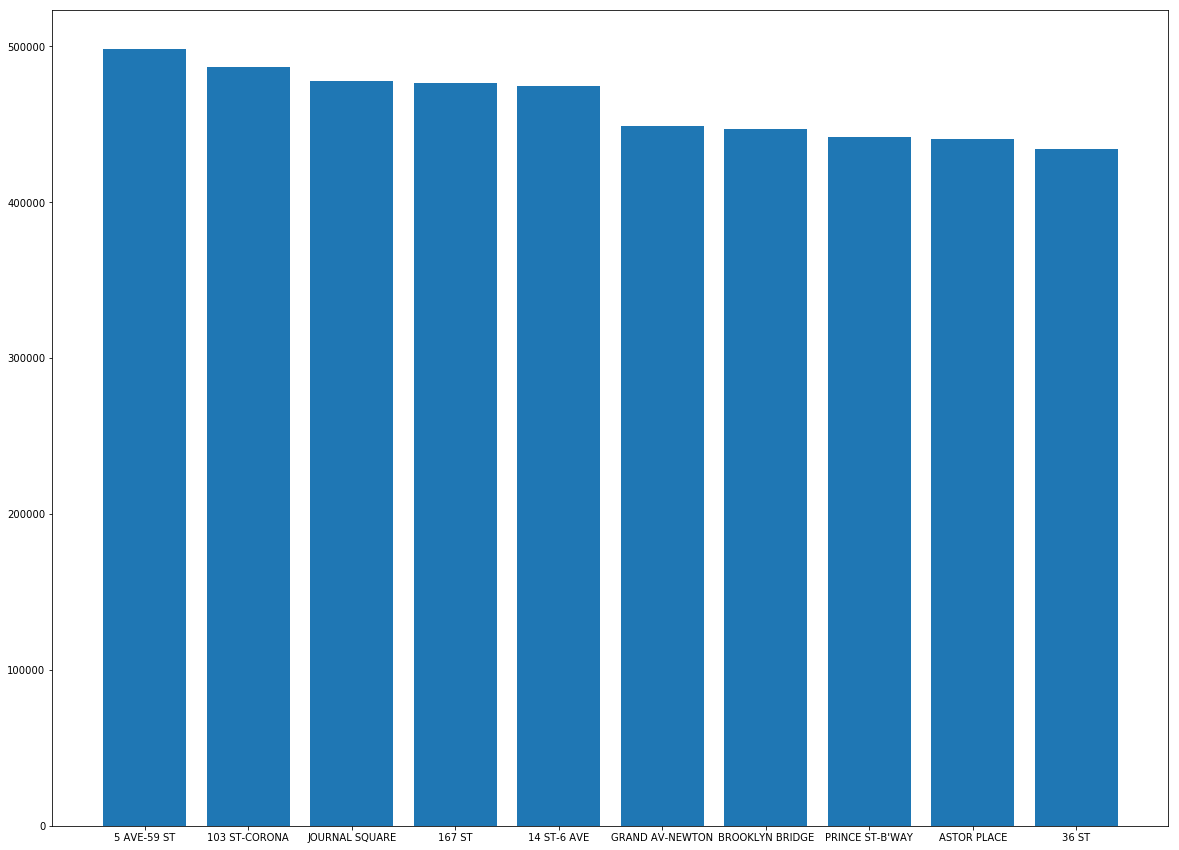

In [399]:
import matplotlib.pyplot as plt

top10 = top10.reset_index()

plt.figure(figsize=(20,15))
x = range(10)
#plt.hist(top10.DAILY)

indices = range(len(top10))
plt.bar(indices, top10.DAILY)

my_xticks = top10.STATION
plt.xticks(x, my_xticks)



========================  TEST CODE HERE ====================================

In [ ]:
# Create an example dataframe
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

In [ ]:
df['reports2'] = df.reports.shift(1)
df['delta'] = df.reports-df.reports2
df

In [ ]:
mta[['DATE_TIME','MONTH','DAY']].head()

**TA COMMENT:**

Overall, the code is easy to follow and you seem to be comfortable with using pandas. I left a few comments throughout the notebook that are specific to certain lines of code. The only general comment I have is to look out for edge cases in your data set and understanding why these edge cases might occur.